In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local

sidm_path = str(os.getcwd()).split("/sidm")[0]
# sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
from sidm.tools import llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm
import coffea.util
import numpy as np

In [2]:
samples_2mu2e = [
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
]

In [3]:
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = 1,
                                )

In [4]:
runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    skipbadfiles=True
)

channels = [
    "baseNoLjNoLjsource", "baseNoLj"
]

p = sidm_processor.SidmProcessor(
    channels,
    # ["matched_jet_base", "fraction_base", "isolation_base", "energy_transfer_base", "muon_crosscleaning_base"],
    ["isolation_base"],
    unweighted_hist=False,
)

out = {}
for i, sample in enumerate(samples_2mu2e):

    # print(f"Processing {sample}")
    fileset_one_sample = {samples_2mu2e[i]:fileset_2mu2e.get(samples_2mu2e[i])}
    
    output = runner.run(fileset_one_sample, treename='Events', processor_instance=p)

    #Add this sample's output to the out variable
    out[sample] = output["out"][sample]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb


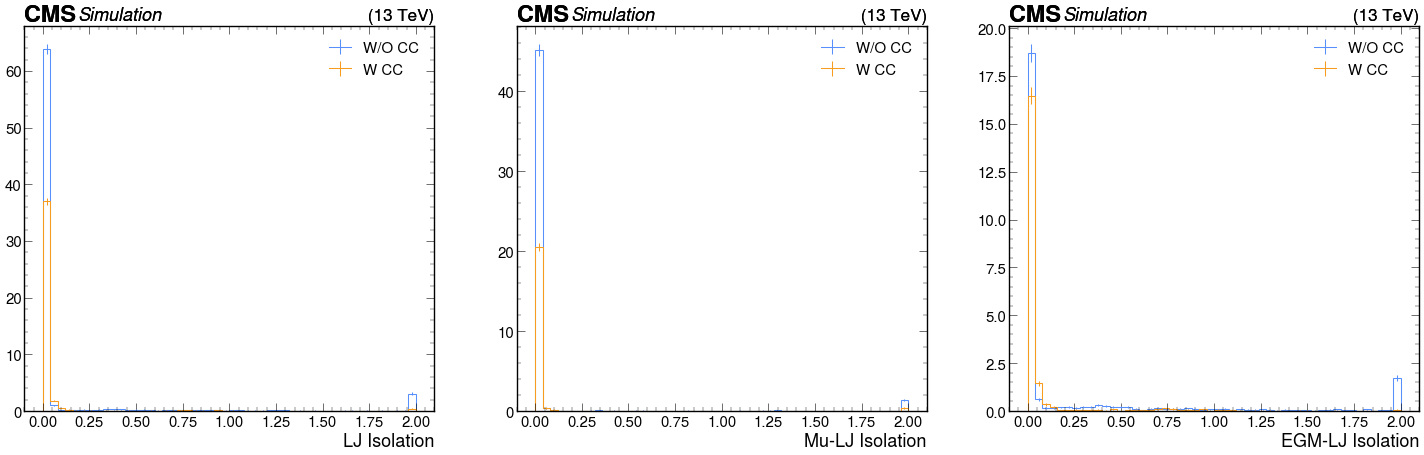

In [7]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=False, label='W/O CC')
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[1], :], density=False, label='W CC')
plt.legend()

plt.subplot(1,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=False, label='W/O CC')
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[1], :], density=False, label='W CC')
plt.legend()

plt.subplot(1,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=False, label='W/O CC')
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[1], :], density=False, label='W CC')
plt.legend()